<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a current clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitude 1 pA and duration 10 ms. Then do the following:
    

    - inject current at the center and at the end of the soma
    - increase and decrease the number of segments per section
    - manipulate the parameters of the soma (resistance Ra and diameter) and interpret the results


In [1]:
pip install hoc2swc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# All the usefull packages
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


# <font color= 'red'>Ex 1:</font> Action Potential Back Propagation. 

<font size='3'> Create a neuron with a soma, an axon with two sections and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma axon and to the dendrite, but not to the branches. You can use the parameters from tutorial 03. 

<font size='3'> Perform a current clamp experiment in which the soma is stimulated at the center and the dendritic branches and axon are recorded at their ends. Choose the best stimulation parameters to see the signal attenuation in the branches, visualize and interpret the results.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the voltage signal propagation from the soma to each of the branches? 
    
<font size='3'>- What happens if the active properties of the dendrite are removed? <font color= 'red'> [1.5 pts]

In [3]:
# Defining some usefull functions.

# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings

def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})

    
def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t


def tvi_plots(t, voltage_records=[], current_records=[], vmax=40, imax=0.5, legendv=True):
    """Plot current and voltage for all stims and recordings"""
    plt.figure()
    plt.title("currents")
    plt.ylim((-0.01, imax))
    plt.xlabel("t (ms)")
    plt.ylabel("I (pA)")
    for idict in current_records:
        plt.plot(t, idict["vec"], label=idict["loc"])
    if legendv:
        plt.legend(loc=1)

    plt.figure()
    plt.title("voltages")
    plt.ylim((-71, vmax))
    plt.ylabel("V (mV)")
    plt.xlabel("t (ms)")
    for vdict in voltage_records:
        plt.plot(t, vdict["vec"], label=vdict["loc"])
    plt.legend(loc=1)


def plot_morphology(fname="cell_01"):
    fname = "{}.swc".format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_morphology(fname)
    view.plot_morph(neuron1)


|-|       soma(0-1)
   `----|       dend(0-1)
         `|       branch_1(0-1)
         `|       branch_2(0-1)
         `|       branch_3(0-1)
 `----|       axon_1(0-1)
       `----|       axon_2(0-1)

Wrote cell 0 to cell_01.swc


cell_01.swc:18:warning



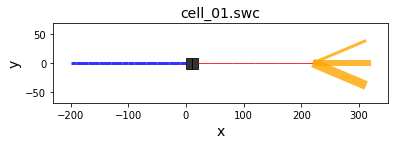

In [28]:
### SOMA 
# Create soma - NO INFO
soma = h.Section(name="soma")
soma.L = 20  # length (µm)
soma.diam = 20  # diameter (µm)
soma.Ra = 123.0  # axial resistivity (Ω*cm)
soma.cm = 1  # capacitance (µF/cm^2)

# Insert passive properties - NO INFO
soma.insert("pas")
for seg in soma:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties - GET VALUES FROM TUTO 3
soma.insert("hh")
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

    
### AXON
# Create Axon (blue in plot) - ONLY INFO 2 SECTIONS
axon1 = h.Section(name="axon_1")
axon2 = h.Section(name="axon_2")

axon1.diam = 3
axon1.L =100  # length (µm)
axon1.nseg = 5  # diameter (µm)
axon1.Ra = 123.0  # axial resistivity (Ω*cm)
axon1.cm = 1  # capacitance (µF/cm^2)

axon2.diam = 3
axon2.L = 100  # length (µm)
axon2.nseg = 5  # diameter (µm)
axon2.Ra = 123.0  # axial resistivity (Ω*cm)
axon2.cm = 1  # capacitance (µF/cm^2)

# Topology
axon1.connect(soma(0))
axon2.connect(axon1(1))

# Insert passive properties - NO INFO
axon1.insert("pas")
for seg in axon1:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

axon2.insert("pas")
for seg in axon2:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties - GET VALUES FROM TUTO 3
axon1.insert("hh")
for seg in axon1:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

axon2.insert("hh")
for seg in axon2:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels


### DENDRITE
# Creat Dendrite (red in plot) - NO INFO 
dend = h.Section(name="dend")
dend.L = 200  # length (µm)
dend.diam = 1  # diameter (µm)
dend.nseg = 5  # number of segments
dend.Ra = 123.0  # axial resistivity (Ω*cm)
dend.cm = 1  # capacitance (µF/cm^2)

# Topology
dend.connect(soma(1))

# Passive properties in dendrite and axon
dend.insert("pas")
for seg in dend:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties - GET VALUES FROM TUTO 3
dend.insert("hh")
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

### DENDRITIC BRANCHES
# Create Dendritic Branches
branch_1 = h.Section(name="branch_1")
branch_2 = h.Section(name="branch_2")
branch_3 = h.Section(name="branch_3")

# Branch geometry all the same length but diffrent parameters
branch_1.L = 100
branch_1.diam = 3
branch_2.L = 100
branch_2.diam = 6
branch_3.L = 100
branch_3.diam = 9

# Topology
branch_1.connect(dend(1))
branch_2.connect(dend(1))
branch_3.connect(dend(1))

# Passive properties in dendrite branches
branchlst = [branch_1, branch_2, branch_3]
for branch in branchlst:
    branch.Ra = 130.0  # axial resistivity (Ω*cm)
    branch.cm = 1  # capacitance (µF/cm^2)
    branch.insert("pas")
    for seg in branch:
        seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
        seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

plot_morphology("cell_01")

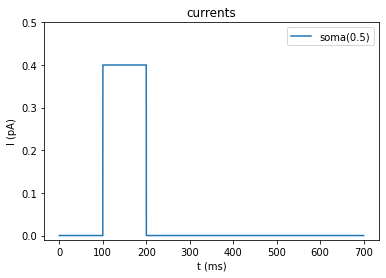

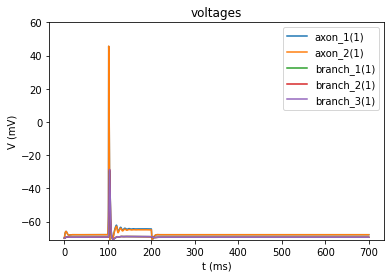

In [33]:
reset()

# Setup stimulations and recordings
# Put current on the middle of the soma
iclamp(soma(0.5), amplitude=0.4, delay=100, duration=100) #test different values

# Record voltage at the end of the axon and dendritic branches
record_voltage(axon1(1))
record_voltage(axon2(1))
for idx, branch in enumerate(branchlst):
    record_voltage(branch(1))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)

<font size='3'> - What are passive and active membrane properties?
    
Passive and active membrane properties are the electrical properties of membranes. Neurons have three passive electrical properties that are important for electrical signaling: resting membrane resistance, membrane capacitance, and intracellular axial resistance along axons and dendrites. Passive properties do not involve voltage-gated or synaptically activated ion channels. They refer to the flow of ions due to the difference in ionic concentration between the outside and inside of the cell only via leakage channels, which have a fixed conductance. In contrast, the active properties are due to the active flow of electrons through (mainly) Na+ and K+ channels. These properties are dictated by the dynamics of these channels and are voltage-dependent and responsible for the shape of the AP curve.

<font size='3'>-  What is going on with the voltage signal propagation from the soma to each of the branches? 

We can see that excitation of the axon close to the soma leads to the firing of multiples action potential. If we plot on the same graph both the voltage recording of both the soma and the branches we can clearly see the attenuation of the potential between the soma and the branches. We see the same shape of activity with a small pick at each AP but with a much lower amplitude. 
   

<font size='3'>- What happens if the active properties of the dendrite are removed?

In this case

# <font color= 'red'>Ex 2:</font> Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot results of different stimulation protocols that help you explain: 
    
    - What is dendritic signal integration? And, in your opinion, what is the importance of this in biology? 
    - What happens if you stimulate only apical dendrites? What is the cause of this effect?
    
<font size="3"> __Hint:__ use the information on the articles that you can find in the home work folder in the moodle for this week 4. <font color= 'red'> [2.5 pts]

In [35]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()

    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        # cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input("Group3_morphology.asc")

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell, 0)
        self.importedcell.instantiate(None)

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if "soma" in sec.name():
                self.somatic.append(sec)
            if "dend" in sec.name():
                self.dendritic.append(sec)
            if "apic" in sec.name():
                self.apical.append(sec)
            if "axon" in sec.name():
                self.axonal.append(sec)

    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert("pas")
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70

        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.dendritic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.apical:
            # insert hh
            sec.insert("hh")
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.axonal:
            # insert hh
            sec.insert("hh")
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [36]:
Cell = NEURON()


19847 lines read


# <font color= 'red'>Ex 3:</font> Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<!-- <font size="3"> -->
    - What would you expect in terms of attenuation? 
    - Would you expect the signal to be more attenuated in the axon or in the dendrites and why? 
    - Which neurite properties does attenuation depend on?
    
    
<font color= 'red'>[2 pts]
    

For this question we re-use the code of the previous question with the Class NEURON

In [37]:
Cell = NEURON()


19847 lines read


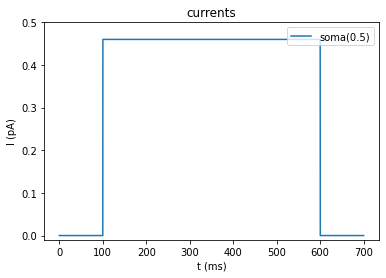

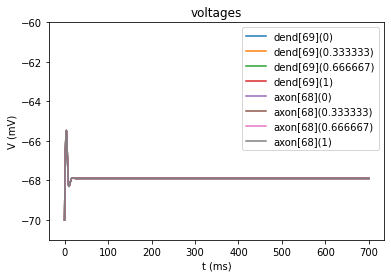

In [41]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 4)

# Setup stimulations and recordings
iclamp(Cell.somatic[0](0.5), amplitude=0.46) # Stimulation in the middle of the soma

# Record of the back propagating sigals on the dendrites
for p in locations:
    record_voltage(Cell.dendritic[70](p))

# Record of the forward signal in the axon
for p in locations:
    record_voltage(Cell.axonal[70](p))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=-60)